<a href="https://colab.research.google.com/github/Aakashaakubhardwaj/Retail-Analysis-Sales-Forecasting/blob/main/Retail_Analysis_with_Walmart_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Retail Analysis with Walmart Data


importing lybraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


loading dataset as data

In [2]:
data = pd.read_csv("/content/Walmart_Store_sales.csv")

In [3]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


checking null values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
data['Date'] =  pd.to_datetime(data['Date'], format="%d-%m-%Y")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [6]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
data["Day"]= pd.DatetimeIndex(data['Date']).day
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Year'] = pd.DatetimeIndex(data['Date']).year
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


Total Sales for each store and finding the store which have maximum sales

Text(0, 0.5, 'Total Sales')

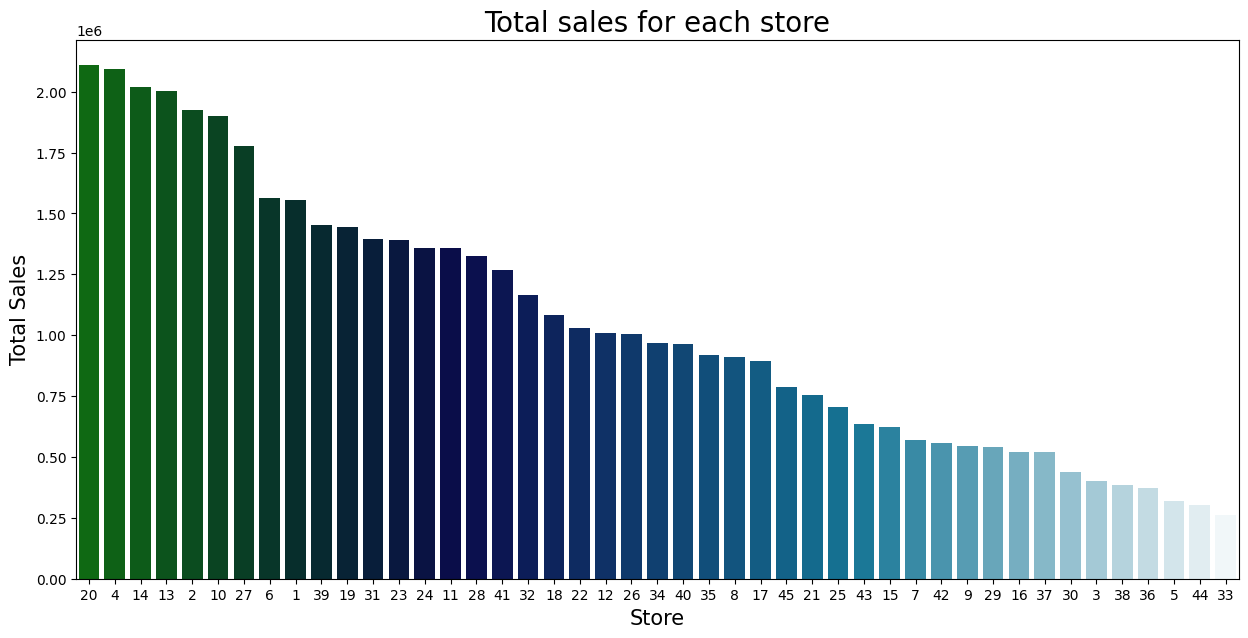

In [8]:
total_sales_by_store = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=0)

plt.figure(figsize = (15,7))
sns.barplot(data = data , y='Weekly_Sales',x= 'Store', order = total_sales_by_store.index,
            errorbar=('ci', False),palette='ocean')

plt.title('Total sales for each store', size = 20)
plt.xlabel('Store', size = 15)
plt.ylabel('Total Sales', size = 15)

In [9]:
total_sales_by_store_sum = pd.DataFrame(total_sales_by_store)
print('The store number',total_sales_by_store_sum.head(1).index[0],'has maximum sales with ${0:.2f} $'.format(total_sales_by_store_sum
                                     .head(1).Weekly_Sales[total_sales_by_store_sum.head(1).index[0]]))

The store number 20 has maximum sales with $301397792.46 $


checking which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation



In [10]:
data_std = pd.DataFrame(data.groupby("Store")['Weekly_Sales'].std().sort_values(ascending=0))
print('The store number',data_std.head(1).index[0],'has maximum standard deviation with ${0:.4f}'.format(data_std
                                     .head(1).Weekly_Sales[data_std.head(1).index[0]]))

The store number 14 has maximum standard deviation with $317569.9495


In [11]:
coef_mean_std = pd.DataFrame(data.groupby('Store')['Weekly_Sales'].std() / data.groupby('Store')['Weekly_Sales'].mean())
coef_mean_std = coef_mean_std.rename(columns={'Weekly_Sales':'Coef. of mean to STD'})
coef_mean_std.sort_values(by='Coef. of mean to STD',ascending=0)

,Coef. of mean to STD
Store,
35,0.229681
7,0.197305
15,0.193384
29,0.183742
23,0.179721
21,0.170292
45,0.165613
16,0.165181
18,0.162845


checking which store/s has good quarterly growth rate in Q3’2012



<Axes: xlabel='Store', ylabel='Weekly_Sales'>

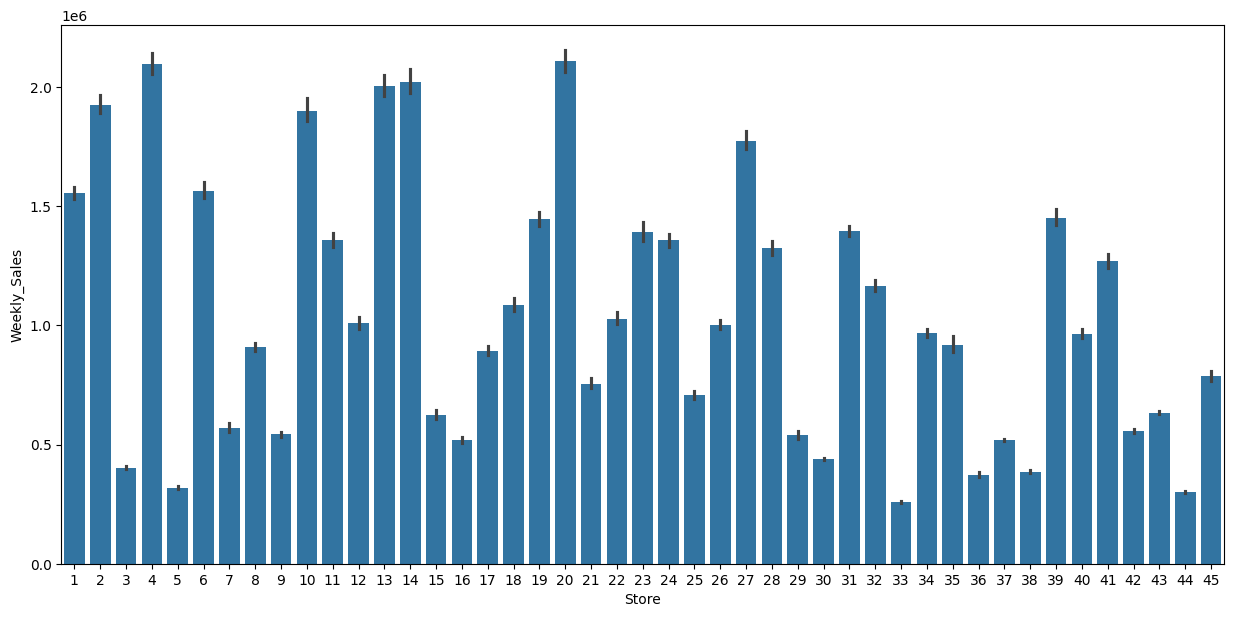

In [12]:
plt.figure(figsize=(15,7))

quarter_3 = data[(data['Date'] >= '2012-07-01') & (data['Date'] <= '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()
sns.barplot(data = data , y='Weekly_Sales',x= 'Store', order = quarter_3.index)

In [13]:
quarter_3_store = pd.DataFrame(quarter_3.sort_values(ascending=0))
print('The store number',quarter_3_store.head(1).index[0],'has maximum sales during third quarter of year 2012 with ${0:.2f}'.format(quarter_3_store
                                     .head(1).Weekly_Sales[quarter_3_store.head(1).index[0]]))

The store number 4 has maximum sales during third quarter of year 2012 with $27796792.46


<Axes: >

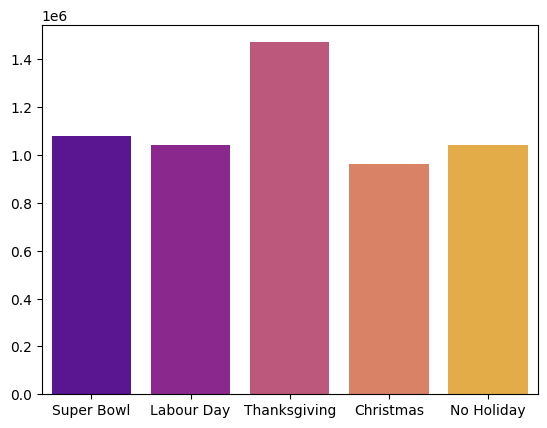

In [14]:
super_bowl = data[data['Date'].isin(['2010-02-12','2011-02-11','2012-02-10','2013-02-08'])]
labour_day = data[data['Date'].isin(['2010-09-10','2011-09-09','2012-09-07','2013-09-06'])]
thanksgiving = data[data['Date'].isin(['2010-11-26','2011-11-25','2012-11-23','2013-11-29'])]
christmas = data[data['Date'].isin(['2010-12-31','2011-12-30','2012-12-28','2013-12-27'])]
no_holiday = data[data['Holiday_Flag'] == 0]

y = [super_bowl['Weekly_Sales'].mean(),
    labour_day['Weekly_Sales'].mean(),
    thanksgiving['Weekly_Sales'].mean(),
    christmas['Weekly_Sales'].mean(),
    no_holiday['Weekly_Sales'].mean()]

x = ['Super Bowl',
    'Labour Day',
    'Thanksgiving',
    'Christmas',
    'No Holiday']


sns.barplot(x = x,y = y,palette='plasma')

ThanksGiving has highest sales while Christmas has lower sales than average daily sales



In [15]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


Providing a monthly and semester view of sales in units and give insights



In [16]:
mr_ws_2010 = data[(data['Year'] == 2010) | (data['Year'] == 2010)].groupby('Month')['Weekly_Sales'].sum()
mr_ws_2011 = data[(data['Year'] == 2011) | (data['Year'] == 2011)].groupby('Month')['Weekly_Sales'].sum()
mr_ws_2012 = data[(data['Year'] == 2012) | (data['Year'] == 2012)].groupby('Month')['Weekly_Sales'].sum()

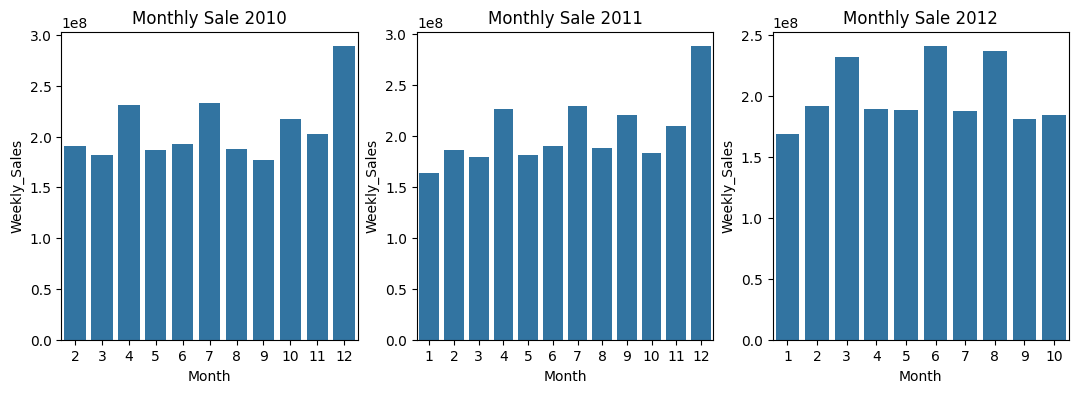

In [17]:
fig, axes = plt.subplots(nrows= 1, ncols= 3, figsize = (13,4))

sns.barplot(data = mr_ws_2010, ax = axes[0])
sns.barplot(data = mr_ws_2011, ax = axes[1])
sns.barplot(data = mr_ws_2012, ax = axes[2])

axes[0].title.set_text("Monthly Sale 2010")
axes[1].title.set_text("Monthly Sale 2011")
axes[2].title.set_text("Monthly Sale 2012")

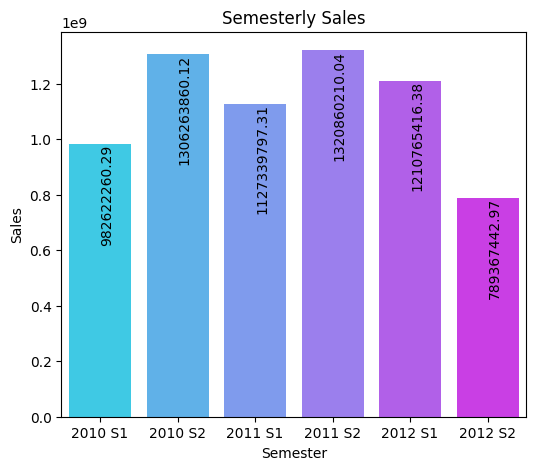

In [18]:
data['Semester'] = data.Date.dt.year.astype(str) + ' S'+ np.where(data.Date.dt.quarter.gt(2),2,1).astype(str)

plt.figure(figsize=(6, 5))
ax = sns.barplot(data = data.drop('Date',
                           axis = 1).groupby('Semester').sum().reset_index(),
            x = 'Semester',
            y = 'Weekly_Sales',
            palette = 'cool')

for i, bar in enumerate(ax.patches):
    plt.annotate(str(bar.get_height()),
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5),
                 ha='left',
                 va='top',
                 rotation = 90)

plt.title("Semesterly Sales")
plt.ylabel("Sales")

plt.show()

In [19]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Semester
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,2010 S1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010,2010 S1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,2010 S1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,2010 S1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010,2010 S1


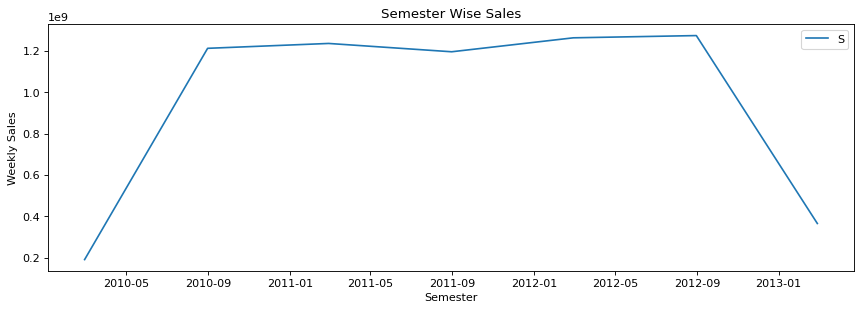

In [20]:
Semester = data.groupby(pd.Grouper(key='Date', freq='6M')).sum()
Semester = Semester.reset_index()
fig, ax = plt.subplots(figsize=(13,4), dpi = 80)
X = Semester['Date']
Y = Semester['Weekly_Sales']
plt.plot(X,Y)
plt.title('Semester Wise Sales')
plt.xlabel('Semester')
plt.ylabel('Weekly Sales')
plt.legend('Sales')
plt.show()

We can infer that there's a big spike in sales from February-2010 to February-2011. Exactly for one year we can say.
Then spike goes bit down in February-2011 after that again there are few ups-downs in further.
From August-2012 sales goes down. - We can acknowledge that there is loss in sales.

Text(0.5, 1.0, 'Yearly view of sales')

<Figure size 1000x600 with 0 Axes>

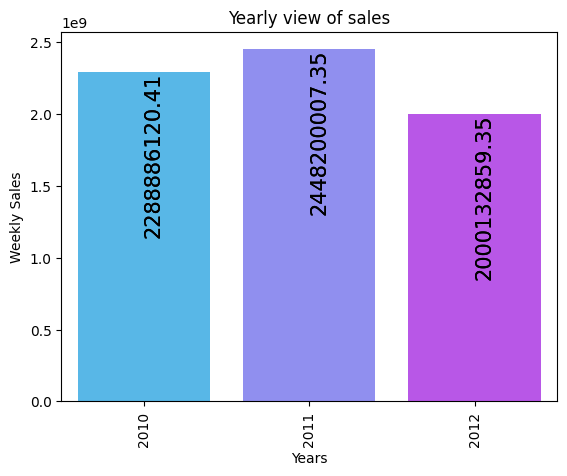

In [21]:
plt.figure(figsize=(10,6))
data.groupby("Year")[["Weekly_Sales"]].sum().plot(kind='bar',legend=False)
ax1 = sns.barplot(data = data.drop('Date',
                           axis = 1).groupby('Year').sum().reset_index(),
            x = 'Year',
            y = 'Weekly_Sales',
            palette = 'cool')
for i, bar in enumerate(ax1.patches):
    plt.annotate(str(bar.get_height()),
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5),
                 ha='left',
                 va='top',
                 rotation = 90 , size =15)
plt.xlabel("Years")
plt.ylabel("Weekly Sales")
plt.title("Yearly view of sales")

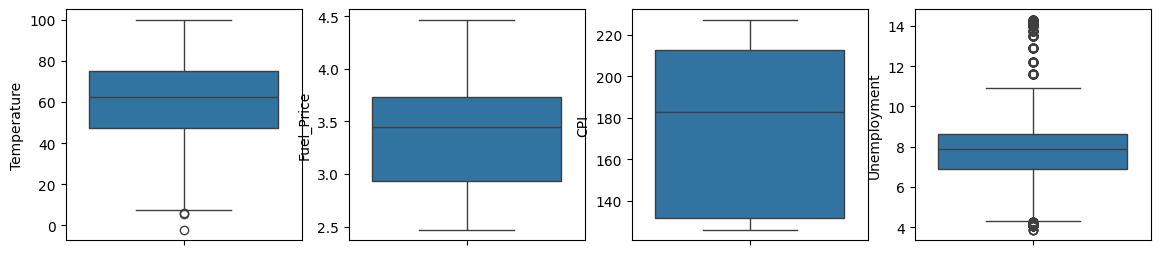

In [22]:
fig, axes = plt.subplots(nrows= 1, ncols= 4, figsize = (14,3))
aa = data[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(aa):
    sns.boxplot(data[column], ax=axes[i])

In [23]:
data_new = data[(data['Unemployment']<11) & (data['Unemployment']>4.5) & (data['Temperature']>10)]
data_new.shape

(5909, 12)

In [24]:
data_new.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year',
       'Semester'],
      dtype='object')

In [25]:
df = data_new[data_new.Store==1]
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Semester
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,2010 S1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010,2010 S1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,2010 S1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,2010 S1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010,2010 S1


In [26]:
df_corr = df.drop(['Date','Semester','Store','Year','Month','Holiday_Flag'],axis=1).corr()
df_corr

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Day
Weekly_Sales,1.000000,-0.222701,0.124592,0.225408,-0.097955,-0.271685
Temperature,-0.222701,1.000000,0.228493,0.118503,-0.180695,0.051077
Fuel_Price,0.124592,0.228493,1.000000,0.755259,-0.513944,0.030806
CPI,0.225408,0.118503,0.755259,1.000000,-0.813471,0.033588
Unemployment,-0.097955,-0.180695,-0.513944,-0.813471,1.000000,-0.018342
Day,-0.271685,0.051077,0.030806,0.033588,-0.018342,1.000000


<Axes: >

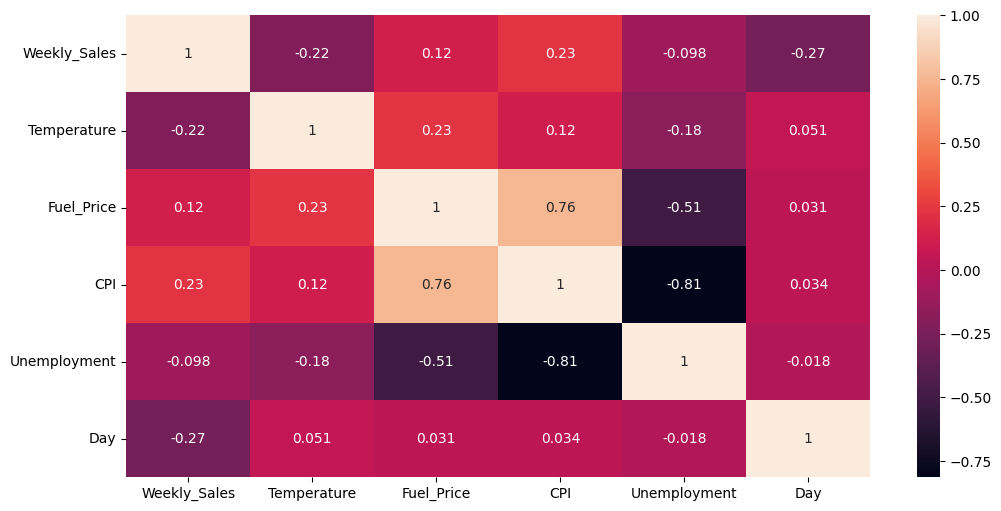

In [27]:
plt.figure(figsize=(12,6))
sns.heatmap(df_corr,annot=True)

Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Insights :

As we can see unemployment is highly correlated with days and is insignificant as it correlation with Weekly Sales is quite low.

Also temperature and Unemployment are negatively impacting the sales .

However Fuel Price and CPI are positively impacting the Sales.

In [28]:
df['Dummy_Date'] = np.arange(1, 144)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Semester,Dummy_Date
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,2010 S1,1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010,2010 S1,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,2010 S1,3
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,2010 S1,4
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010,2010 S1,5


In [29]:
X = df[['Day', 'Fuel_Price', 'CPI', 'Unemployment','Dummy_Date']]
Y = df['Weekly_Sales']

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=123)

In [31]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)
y_pred

array([1595832.53130404, 1580620.44852224, 1599664.48292828,
       1476804.30129238, 1542992.29919025, 1466296.29275458,
       1565758.10755407, 1560665.67410443, 1621488.99252327,
       1461025.60632901, 1562585.50405478, 1571590.22093458,
       1620175.65721518, 1504354.24554309, 1697279.56709584,
       1526513.34212581, 1465995.60220694, 1466839.5739831 ,
       1622496.58423621, 1445895.40836535, 1569482.71744364,
       1581344.16051981, 1425604.89132772, 1515158.38127319,
       1617421.05791138, 1509874.34466506, 1487489.92783866,
       1461450.45492767, 1452584.77866004])

In [33]:
from sklearn import metrics

In [34]:
print('Accuracy:',model.score(X_train,Y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Accuracy: 0.20412324641114243
Mean Absolute Error: 91322.68031462767
Mean Squared Error: 20573489202.111015
Root Mean Squared Error: 143434.61647074955


In [35]:
model.coef_

array([ -5305.9198414 , -79264.15847392,  31957.65167174, 137414.20129299,
         -649.00683375])

In [36]:
print('Variance score: %.2f' % model.score(X_test, Y_test))

Variance score: -0.12


From above I can infer that Linear Regression model performs very poorly on our dataset.

As we can see the variance is in negative numbers. Which indicates that our model is Poor.

Minimum variance helps our model to be ideal / accurate, Therefore further down I'll implement RandomForest algorithms and check for accuray.

If accuracy increses, then I will pick the model.

Another way we can check accuracy by showing comparison between actual values and predicted values.

In [37]:
Actual_vs_Pred = pd.DataFrame({"Actual Sales" : Y_test, "Predicted Sales": y_pred})
Actual_vs_Pred.head()

,Actual Sales,Predicted Sales
136,1517428.87,1.595833e+06
128,1497954.76,1.580620e+06
114,1621031.70,1.599664e+06
45,1891034.93,1.476804e+06
31,1507460.69,1.542992e+06


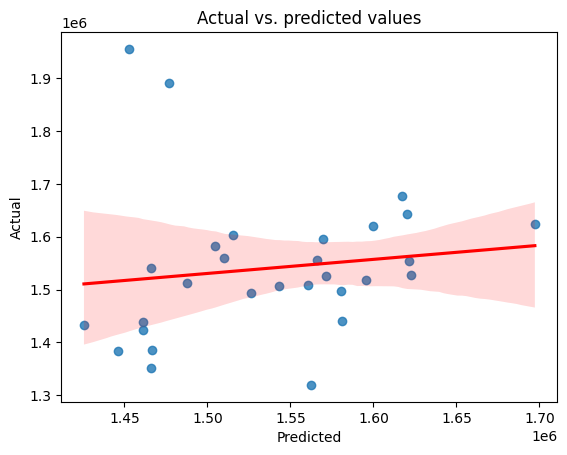

In [38]:
sns.regplot(x=y_pred, y=Y_test, line_kws={'color': 'red'})
plt.title('Actual vs. predicted values')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [39]:
rfr = RandomForestRegressor(n_estimators = 400, max_depth = 15)
rfr.fit(X_train, Y_train)
Y_pred = rfr.predict(X_test)

print('Accuracy:',rfr.score(X_train,Y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('-'*40)
print('Variance score: %.2f' % rfr.score(X_test, Y_test))

Accuracy: 0.8657479683015437
Mean Absolute Error: 103818.64311307437
Mean Squared Error: 26349869327.027294
Root Mean Squared Error: 162326.42830736865
----------------------------------------
Variance score: -0.43


In [40]:
Actual_vs_Pred = pd.DataFrame({"Actual Sales" : Y_test, "Predicted Sales": Y_pred})
Actual_vs_Pred.head()

,Actual Sales,Predicted Sales
136,1517428.87,1.599565e+06
128,1497954.76,1.500122e+06
114,1621031.70,1.729136e+06
45,1891034.93,1.587638e+06
31,1507460.69,1.569656e+06


In [41]:
Errors = pd.DataFrame({'errors':round(((abs(Y_pred - Y_test))/Y_test)*100,2)})
Errors.head()

,errors
136,5.41
128,0.14
114,6.67
45,16.04
31,4.13


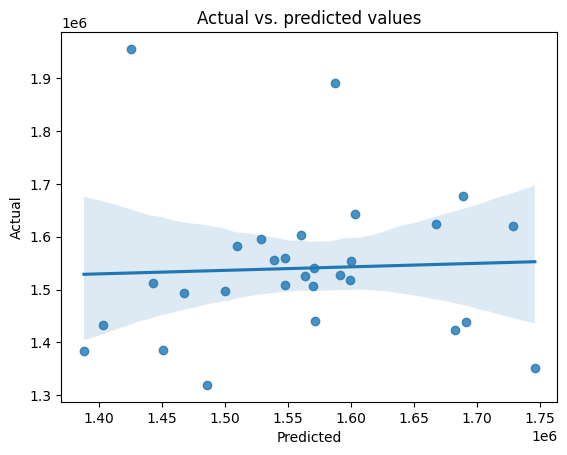

In [43]:
sns.regplot(x=Y_pred, y=Y_test)
plt.title('Actual vs. predicted values')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

So here we can see, we have predicted demand for store 1

Further down I've shown a table that shows errors in %, w.r.t the store sales demand.

Errors are not huge to decline our model also the variance is good.

Therefore we accept this Model - RandomForest Regressor.